#DV PRESENTATION- Group 3
#20181CSE0568  : Preethi
#20181CSE0548 : Kamal
#20181CSE0571 : AVINASH
#20181CSE0557 : Pranay

#Fine Food


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import plotly
import seaborn as sns
import os # accessing directory structure
from wordcloud import WordCloud, STOPWORDS

In [5]:
nRowsRead = 5000 # we are only loading/previewing the first 5000 rows
# FineFood.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
reviews = pd.read_csv('/content/Reviews.csv', delimiter=',', nrows = nRowsRead)
reviews.dataframeName = 'Reviews.csv'
nRow, nCol = reviews.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5000 rows and 10 columns


In [6]:
reviews.shape

(5000, 10)

In [7]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [9]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,1.580200,2.067200,4.150400,1.294930e+09
std,1443.520003,5.584533,6.288672,1.326549,4.802063e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1250.750000,0.000000,0.000000,4.000000,1.271376e+09
50%,2500.500000,0.000000,1.000000,5.000000,1.309219e+09
75%,3750.250000,2.000000,2.000000,5.000000,1.330301e+09
max,5000.000000,187.000000,216.000000,5.000000,1.351210e+09


## First--performing some minor feature engineering to get percentage of and rescale helpfulness by dividing numerator by denominator

In [10]:
reviews["Helpfulness"] = reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"] # it will produce some nan
reviews['Helpfulness'].fillna(0).head()
reviews["Helpfulness"].mean()

0.755997091359367

##inputing missing titles with ''-blank

In [11]:
reviews["Summary"] = reviews["Summary"].fillna('')

In [12]:
reviews["Summary_length"] = reviews["Summary"].map(lambda x: len(x.split()))
reviews["Text_length"] = reviews["Text"].map(lambda x: len(x.split()))

In [13]:
pd.DatetimeIndex(reviews['Time']).year.value_counts()

1970    5000
Name: Time, dtype: int64

#Calculating Sentiment

In [14]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.8 MB/s 


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initilize Sentiment analyzer
analyser = SentimentIntensityAnalyzer()

# scorer function based on cutoffs
def score_sentiment(compound_score):
    if compound_score >= 0.05:
        return("Positive")
    elif compound_score < 0.05 and compound_score >= -0.05:
        return("Neutral")
    else:
        return("Negative")

In [16]:
reviews["Text_sentiment"] = reviews["Text"].map(lambda x: score_sentiment(analyser.polarity_scores(x)['compound']))
reviews["Summary_sentiment"] = reviews["Summary"].map(lambda x: score_sentiment(analyser.polarity_scores(x)['compound']))

In [17]:
reviews["Text_sentiment"].head()

0    Positive
1    Negative
2    Positive
3    Positive
4    Positive
Name: Text_sentiment, dtype: object

In [18]:
reviews["Summary_sentiment"].head()

0    Positive
1     Neutral
2    Positive
3     Neutral
4    Positive
Name: Summary_sentiment, dtype: object

#Number of reviews overtime


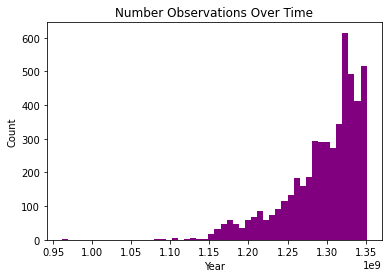

In [19]:
plt.hist(reviews["Time"], bins=50, color='purple')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number Observations Over Time')
plt.show()

In [20]:
pd.DatetimeIndex(reviews['Time']).year == '2000'

array([False, False, False, ..., False, False, False])

#Score count

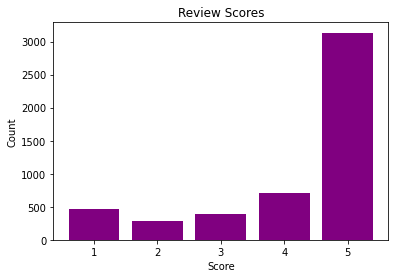

In [21]:
# plotting number of scores 
score_counts = reviews["Score"].value_counts().to_dict()
plt.bar(score_counts.keys(),height=score_counts.values(),color='purple')
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Review Scores')
plt.show()

#Text Sentiment

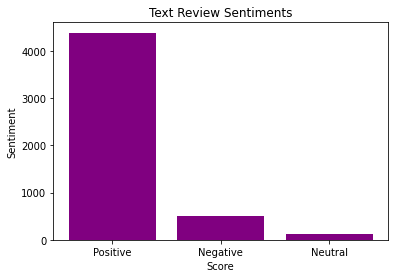

In [22]:
text_sentiment_counts = reviews["Text_sentiment"].value_counts().to_dict()
plt.bar(text_sentiment_counts.keys(),height=text_sentiment_counts.values(),color='purple')
plt.ylabel('Sentiment')
plt.xlabel('Score')
plt.title('Text Review Sentiments')
plt.show()

# Summary_sentiment

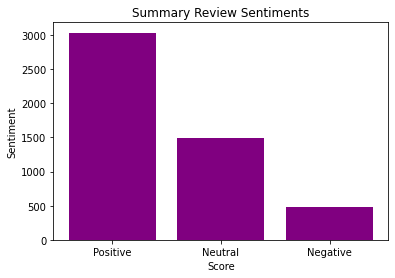

In [23]:
summary_sentiment_counts = reviews["Summary_sentiment"].value_counts().to_dict()
plt.bar(summary_sentiment_counts.keys(),height=summary_sentiment_counts.values(),color='purple')
plt.ylabel('Sentiment')
plt.xlabel('Score')
plt.title('Summary Review Sentiments')
plt.show()

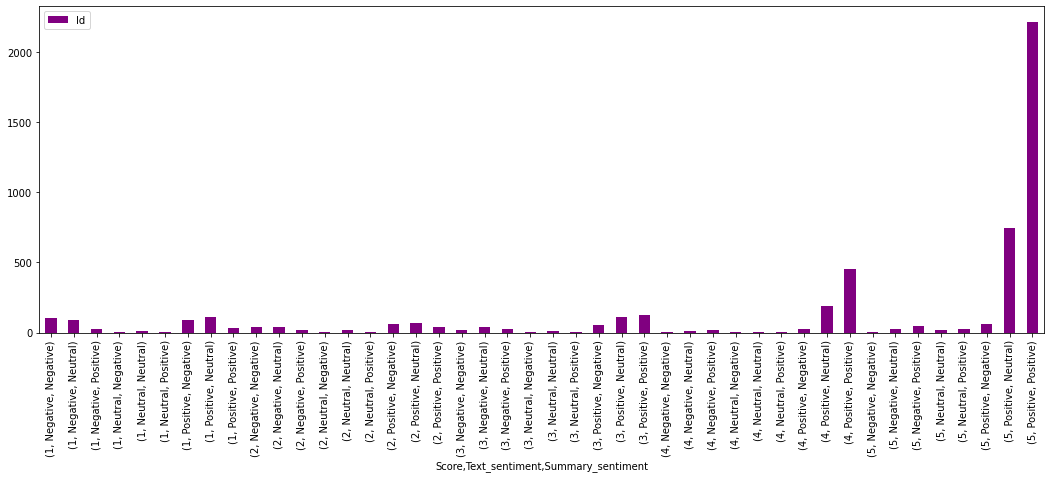

In [24]:
reviews.groupby(['Score','Text_sentiment','Summary_sentiment']).count()[["Id"]].plot.bar(figsize=(18,6), color='purple')
plt.show()

#Caluculations:

In [25]:
# calculating Helpfulness percentage
reviews["Helpfulness"] = reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"] # it will produce some nan
# filling above nan values with 0
reviews['Helpfulness'].fillna(0).head()
reviews["Helpfulness"].mean()

0.755997091359367

In [26]:
# calculating summary lengths
reviews["Summary_length"] = reviews["Summary"].map(lambda x: len(x.split()))

# calculating review lengths
reviews["Text_length"] = reviews["Text"].map(lambda x: len(x.split()))

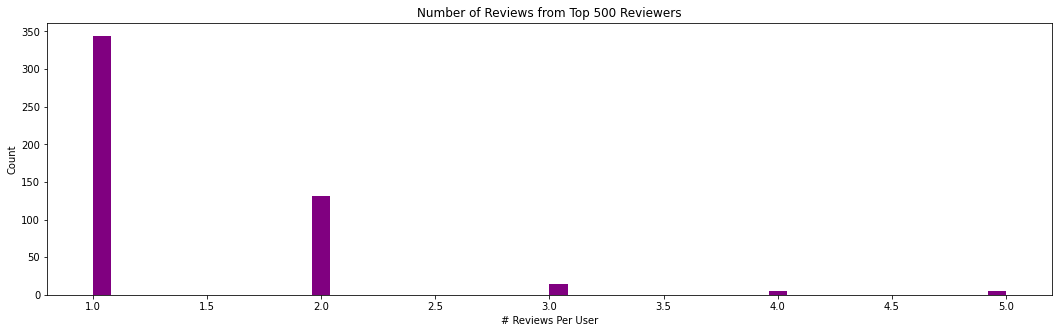

In [27]:
top_500_reviewers_count = reviews["UserId"].value_counts().nlargest(500)

plt.figure(figsize=(18,5))
plt.hist(top_500_reviewers_count,bins=50,color='purple')
plt.ylabel('Count')
plt.xlabel('# Reviews Per User')
plt.title('Number of Reviews from Top 500 Reviewers')
plt.show()

In [28]:
top_users = reviews.loc[reviews['UserId'].isin(top_500_reviewers_count.index)]
top_users = top_users.sort_values(['UserId', 'Time'])
top_users.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,Summary_length,Text_length,Text_sentiment,Summary_sentiment
3818,3819,B000X2CWTM,A102XKYZE9Q9L4,"TjB ""cancer-free!""",5,6,5,1250812800,LICORICE LOWERS BLOOD SUGARS~,"If you deal with diabetes or hypoglycemia, ple...",0.833333,4,97,Positive,Negative
4587,4588,B002TMV3E4,A1157CR0T5UM9D,Evelyn Uyemura,0,3,4,1284163200,Rich smooth taste,I have had to cut back on caffeine recently be...,0.000000,3,145,Positive,Positive


In [29]:
# creating numbered entry per person based on sorted list of userid above
review_times_vector = [[j + 1 for j in range(i)] for i in top_500_reviewers_count[top_500_reviewers_count.index.sort_values()]]
review_times_vector_flat = [item for sublist in review_times_vector for item in sublist]

# adding numbered review order
top_users["Review_times"] = review_times_vector_flat

In [30]:
#summary length
summary_length_df = top_users.groupby(top_users.Review_times)[['Summary_length']].median()
summary_length_df.reset_index(level=0,inplace=True)
summary_length_df['Review_times'] = pd.to_numeric(summary_length_df['Review_times'])
summary_length_df.head()

,Review_times,Summary_length
0,1,3.0
1,2,4.0
2,3,4.0
3,4,6.5
4,5,6.0


In [31]:
# text length
text_length_df = top_users.groupby(top_users.Review_times)[['Text_length']].median()
text_length_df.reset_index(level=0, inplace=True)
text_length_df['Review_times'] = pd.to_numeric(text_length_df['Review_times'])
text_length_df.head()

,Review_times,Text_length
0,1,56.0
1,2,76.0
2,3,122.0
3,4,139.5
4,5,135.0


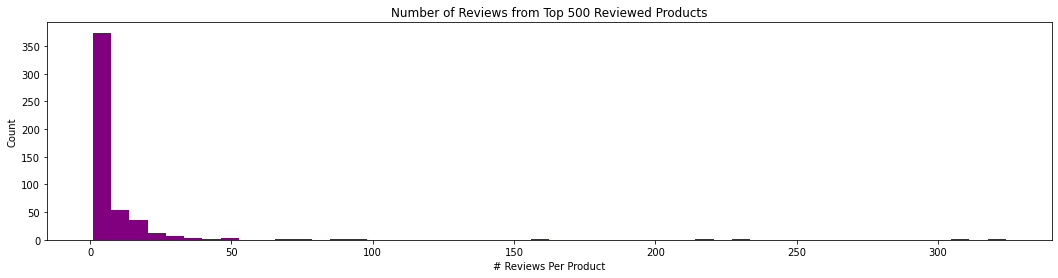

In [32]:
top_500_product_count = reviews["ProductId"].value_counts().nlargest(500)

plt.figure(figsize=(18,4))
plt.hist(top_500_product_count,bins=50,color='purple')
plt.ylabel('Count')
plt.xlabel('# Reviews Per Product')
plt.title('Number of Reviews from Top 500 Reviewed Products')
plt.show()

In [33]:
top_products = reviews.loc[reviews['ProductId'].isin(top_500_product_count.index)]
top_products_mean = top_products.groupby('ProductId').mean().filter(['Score','Helpfulness','Text_length','Summary_length'])
top_products_mean.head()

,Score,Helpfulness,Text_length,Summary_length
ProductId,,,,
B00002NCJC,4.5,NaN,25.0,2.0
B00002Z754,5.0,1.00,57.5,4.0
B000084DVR,5.0,1.00,65.0,3.0
B0000DC5IY,1.0,0.75,125.5,6.5
B0000E65W9,5.0,1.00,134.0,5.0


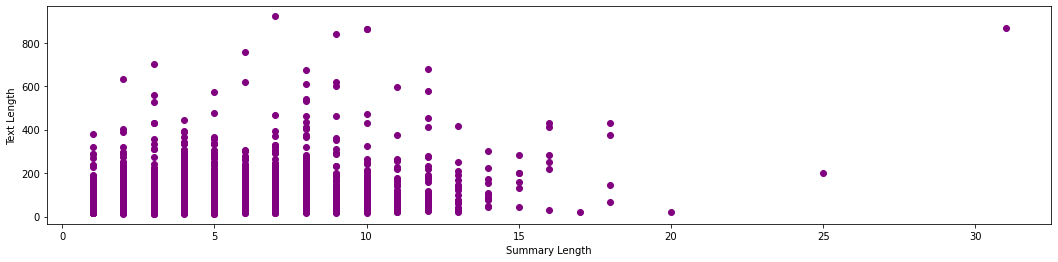

In [34]:
# scatter plot of summary_length and review_length
plt.figure(figsize=(18,4))
plt.scatter(reviews["Summary_length"], reviews["Text_length"], color='purple')
plt.xlabel("Summary Length")
plt.ylabel("Text Length")
plt.show()

#Review Length (Summary_Length and Text_Length Feature)
##Observation: HISTOGRAM plots shows that Summary_Length and Text_legnth is right skewed

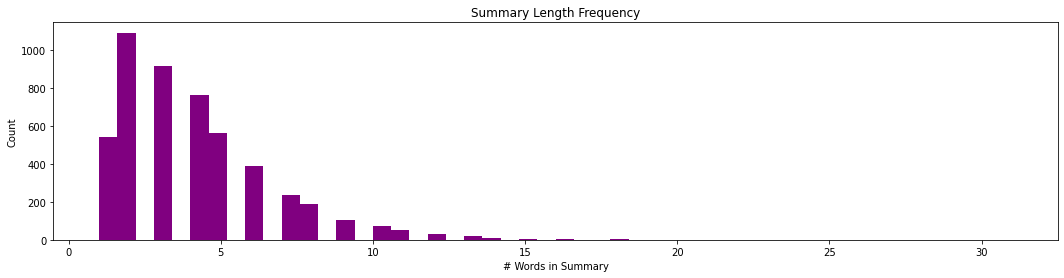

In [35]:
plt.figure(figsize=(18,4))
plt.hist(reviews['Summary_length'],bins=50,color='purple')
plt.ylabel('Count')
plt.xlabel('# Words in Summary')
plt.title('Summary Length Frequency')
plt.show()

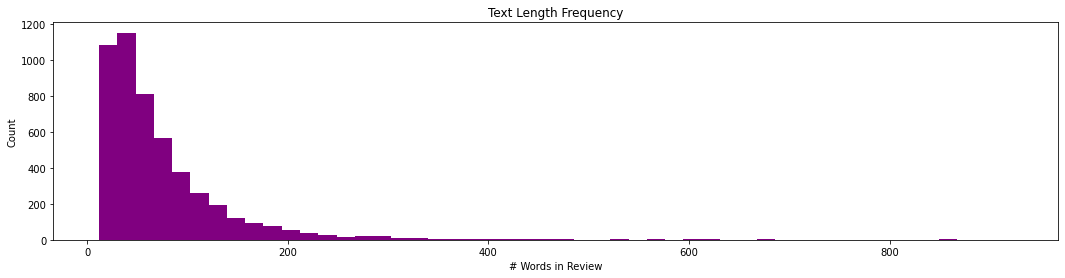

In [36]:
plt.figure(figsize=(18,4))
plt.hist(reviews['Text_length'],bins=50,color='purple')
plt.ylabel('Count')
plt.xlabel('# Words in Review')
plt.title('Text Length Frequency')
plt.show()

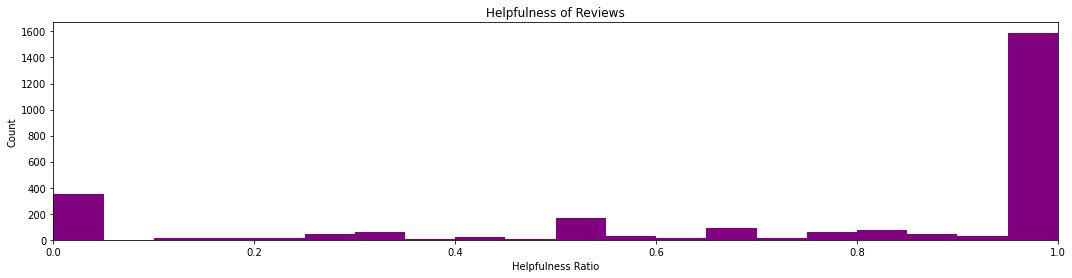

In [37]:
plt.figure(figsize=(18,4))

plt.hist(reviews['Helpfulness'],bins=20,color='purple')
plt.ylabel('Count')
plt.xlabel('Helpfulness Ratio')
plt.title('Helpfulness of Reviews')
plt.xlim(0,1)
plt.show()

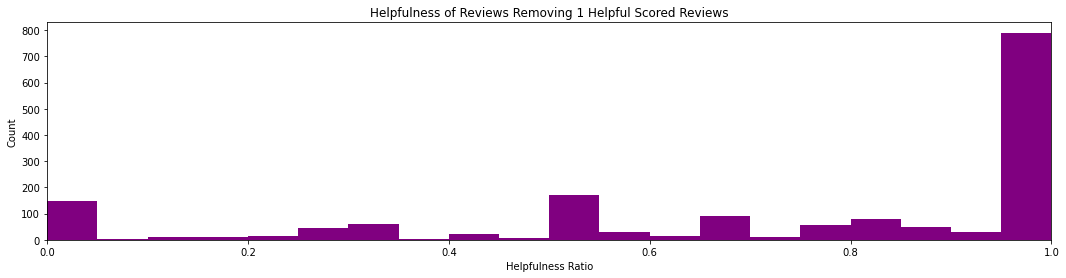

In [38]:
plt.figure(figsize=(18,4))

plt.hist(reviews[reviews['HelpfulnessDenominator'] != 1]['Helpfulness'].dropna(), bins=20, color='purple')
plt.ylabel('Count')
plt.xlabel('Helpfulness Ratio')
plt.title('Helpfulness of Reviews Removing 1 Helpful Scored Reviews')
plt.xlim(0,1)
plt.show()

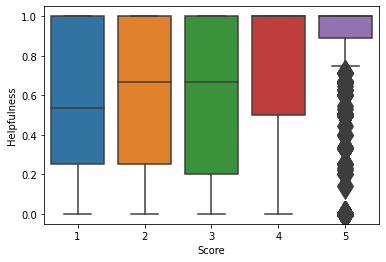

In [40]:
sns.boxplot(x='Score',y='Helpfulness',data=reviews,fliersize=18)
plt.show()

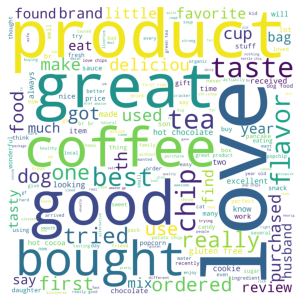

In [96]:
r=reviews['Text'].str.lower()
r = r.to_string()
s=reviews['Summary'].str.lower()
stopwords = set(STOPWORDS) 
wc = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, min_font_size = 10)
wc = wc.generate(r)
plt.figure(facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

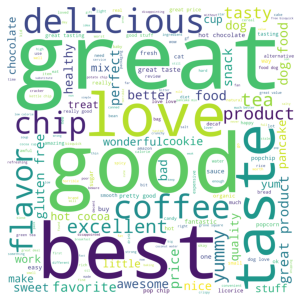

In [97]:
s = s.to_string()
wc = wc.generate(s)
plt.figure(facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

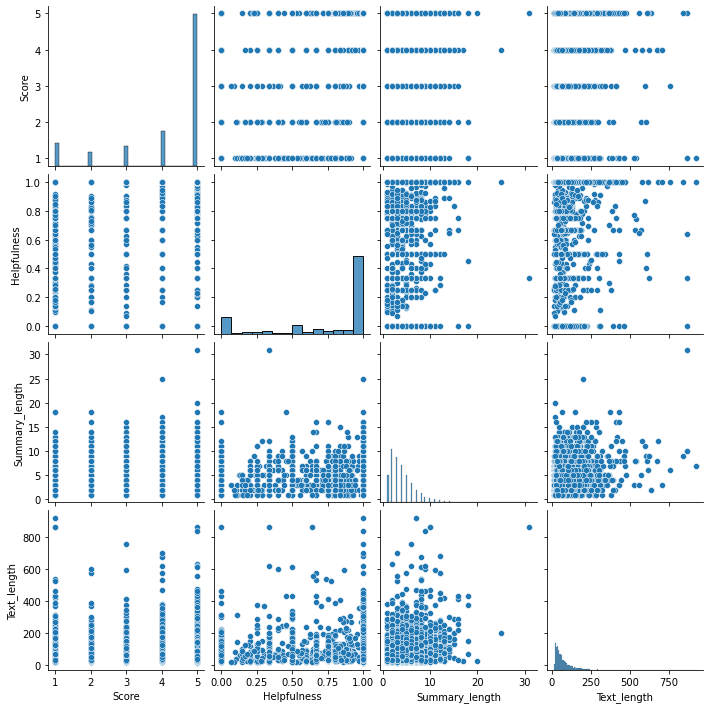

In [98]:
sns.pairplot(reviews[['Score','Helpfulness','Summary_length','Text_length']])
plt.show()

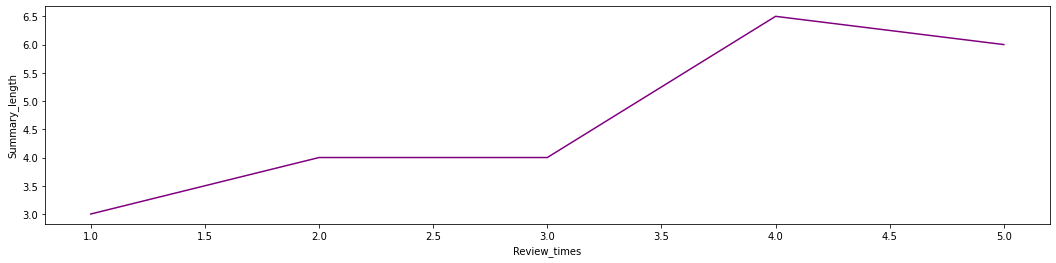

In [41]:
plt.figure(figsize=(18,4))
sns.lineplot(y='Summary_length',x='Review_times',data=summary_length_df , color='purple')
plt.show()

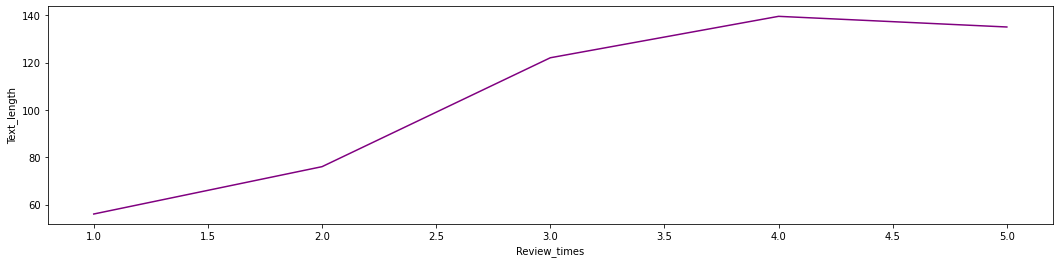

In [42]:
plt.figure(figsize=(18,4))
sns.lineplot(y='Text_length',x='Review_times',data=text_length_df, color='purple')
plt.show()

#Electronics

In [45]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import sklearn
import plotly
import seaborn as sns
import os # accessing directory structure
from wordcloud import WordCloud, STOPWORDS

In [46]:
nRowsRead = 5000 # we are only loading/previewing the first 5000 rows
# FineFood.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
electronic = pd.read_csv('/content/Electronic.csv', delimiter=',', nrows = nRowsRead)
electronic.dataframeName = 'Electronic.csv'
nRow, nCol = electronic.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50 rows and 14 columns


In [47]:
electronic.shape

(50, 14)

In [48]:
electronic.head(20)

,Order_ID,Order_Date,Shipping_Date,Aging,Ship_Mode,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Zip_Code
0,El-2015-1,25-02-2015,26-02-2015,4,Flight,Electronic,Samsung Mobile,$220.0,2,0.01,$135.6,$13.6,Critical,16515
1,El-2015-2,22-06-2015,27-06-2015,5,Flight,Electronic,Watch,$104.0,1,0.03,$20.9,$2.1,Critical,14030
2,El-2015-3,25-10-2015,30-10-2015,2,Flight,Electronic,Fans,$149.0,4,0.01,$63.0,$6.3,Critical,12075
3,El-2015-4,15-10-2015,16-10-2015,3,Flight,Electronic,Iron,$222.0,4,0.03,$115.4,$11.5,Critical,11866
4,El-2015-5,02-02-2015,06-02-2015,5,Flight,Electronic,Tablet,$199.0,3,0.05,$89.2,$8.9,High,13834
5,El-2015-6,24-11-2015,28-11-2015,3,Flight,Electronic,Mouse,$111.0,2,0.01,$28.8,$2.9,High,18445
6,El-2015-7,22-09-2015,25-09-2015,3,Flight,Electronic,Keyboard,$33.0,4,0.01,$8.3,$0.8,High,12902
7,El-2015-8,06-02-2015,07-02-2015,3,Flight,Electronic,Apple Laptop,$250.0,3,0.05,$132.5,$13.3,Critical,17669
8,El-2015-9,20-11-2015,22-11-2015,3,Flight,Electronic,Mixer/Juicer,$83.0,4,0.05,$20.8,$2.1,Critical,19511
9,El-2015-10,08-04-2015,10-04-2015,1,Same Day,Electronic,LED,$192.0,3,0.03,$94.7,$9.5,High,13709


In [49]:
electronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          50 non-null     object 
 1   Order_Date        50 non-null     object 
 2   Shipping_Date     50 non-null     object 
 3   Aging             50 non-null     int64  
 4   Ship_Mode         50 non-null     object 
 5   Product_Category  50 non-null     object 
 6   Product           50 non-null     object 
 7    Sales            50 non-null     object 
 8   Quantity          50 non-null     int64  
 9   Discount          50 non-null     float64
 10   Profit           50 non-null     object 
 11   Shipping_Cost    50 non-null     object 
 12  Order_Priority    50 non-null     object 
 13  Zip_Code          50 non-null     int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 5.6+ KB


In [50]:
electronic.describe()

,Aging,Quantity,Discount,Zip_Code
count,50.000000,50.000000,50.000000,50.000000
mean,2.800000,3.140000,0.026000,18027.440000
std,1.340119,1.261842,0.015518,12283.317281
min,1.000000,1.000000,0.010000,10474.000000
25%,2.000000,2.000000,0.010000,12902.000000
50%,3.000000,3.000000,0.020000,14552.000000
75%,3.000000,4.000000,0.037500,17756.000000
max,5.000000,5.000000,0.050000,83709.000000


In [51]:
# calculating Helpfulness percentage
electronic["helpfull"] = electronic["Quantity"]/electronic["Discount"] # it will produce some nan
# filling above nan values with 0
electronic['helpfull'].fillna(0).head()
electronic["helpfull"].mean()

181.4333333333333

In [52]:
electronic["Order_Priority"] = electronic["Order_Priority"].fillna('')

In [53]:
# calculating summary lengths
electronic["Order_Priority_length"] = electronic["Order_Priority"].map(lambda x: len(x.split()))

# calculating review lengths
electronic["Product_length"] = electronic["Product"].map(lambda x: len(x.split()))


In [54]:
pd.DatetimeIndex(electronic['Discount']).year.value_counts()

1970    50
Name: Discount, dtype: int64

In [55]:
!pip install vaderSentiment

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initilize Sentiment analyzer
analyser = SentimentIntensityAnalyzer()

# scorer function based on cutoffs
def Shipping_Cost_sentiment(compound_Shipping_Cost):
    if compound_Shipping_Cost >= 5.0:
        return("Positive")
    elif compound_Shipping_Cost < 20.0 and compound_Shipping_Cost >=5.0 :
        return("Neutral")
    else:
        return("Negative")

In [57]:
electronic["Product_sentiment"] = electronic["Product"].map(lambda x:Shipping_Cost_sentiment(analyser.polarity_scores(x)['compound']))
electronic["Order_Priority_sentiment"] = electronic["Order_Priority"].map(lambda x: Shipping_Cost_sentiment(analyser.polarity_scores(x)['compound']))

In [58]:
electronic["Product_sentiment"].head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: Product_sentiment, dtype: object

In [59]:
electronic["Order_Priority_sentiment"].head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: Order_Priority_sentiment, dtype: object

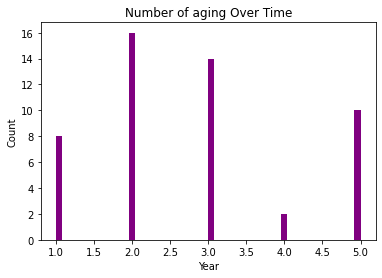

In [60]:
plt.hist(electronic["Aging"], bins=50, color='purple')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of aging Over Time')
plt.show()

In [61]:
pd.DatetimeIndex(electronic['Order_Date']).year == '2015'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

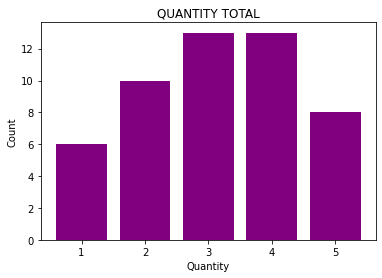

In [62]:
# plotting number of scores 
quantity_counts = electronic["Quantity"].value_counts().to_dict()
plt.bar(quantity_counts.keys(),height=quantity_counts.values(),color='purple')
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('QUANTITY TOTAL')
plt.show()

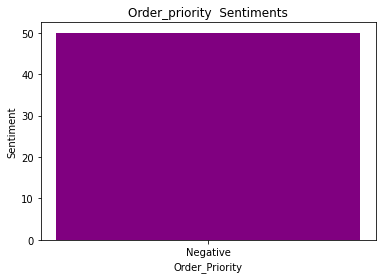

In [63]:
order_priority_sentiment_counts = electronic["Order_Priority_sentiment"].value_counts().to_dict()
plt.bar(order_priority_sentiment_counts.keys(),height=order_priority_sentiment_counts.values(),color='purple')
plt.ylabel('Sentiment')
plt.xlabel('Order_Priority')
plt.title('Order_priority  Sentiments')
plt.show()

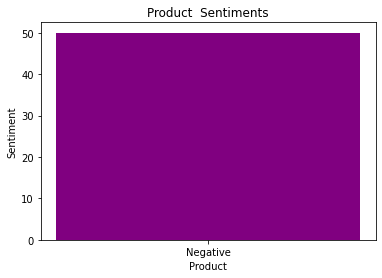

In [64]:
product_sentiment_counts = electronic["Product_sentiment"].value_counts().to_dict()
plt.bar(product_sentiment_counts.keys(),height=product_sentiment_counts.values(),color='purple')
plt.ylabel('Sentiment')
plt.xlabel('Product')
plt.title('Product  Sentiments')
plt.show()

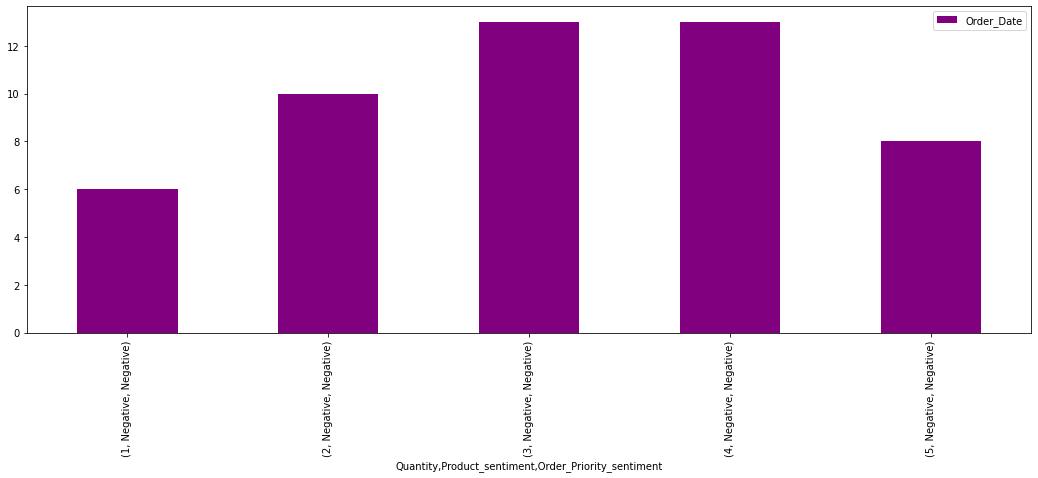

In [65]:
electronic.groupby(['Quantity','Product_sentiment','Order_Priority_sentiment']).count()[["Order_Date"]].plot.bar(figsize=(18,6), color='purple')
plt.show()

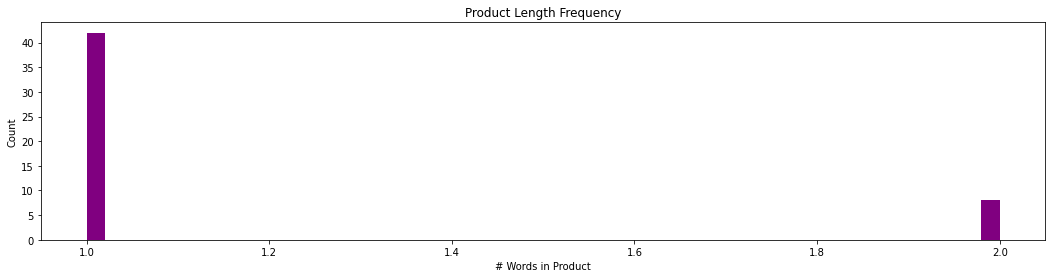

In [66]:
plt.figure(figsize=(18,4))
plt.hist(electronic['Product_length'],bins=50,color='purple')
plt.ylabel('Count')
plt.xlabel('# Words in Product')
plt.title('Product Length Frequency')
plt.show()

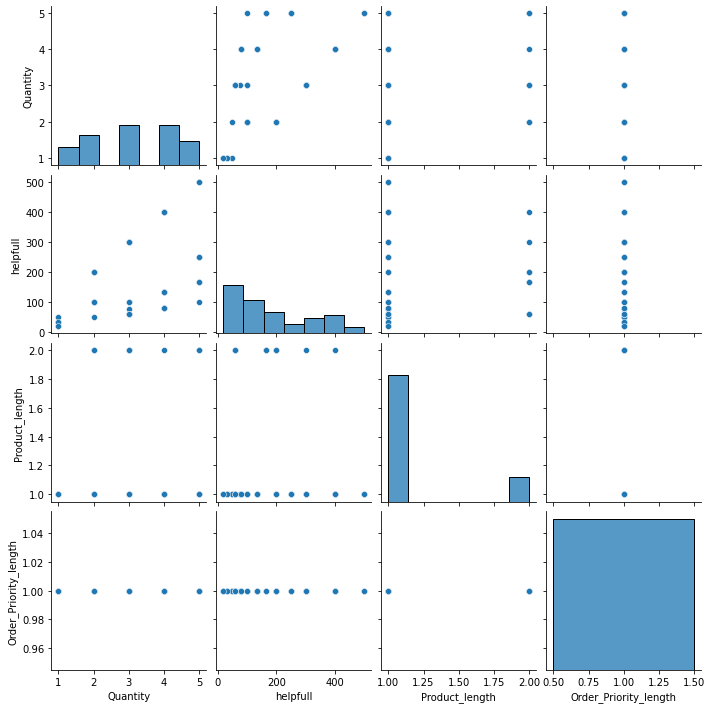

In [67]:
sns.pairplot(electronic[['Quantity','helpfull','Product_length','Order_Priority_length']])
plt.show()

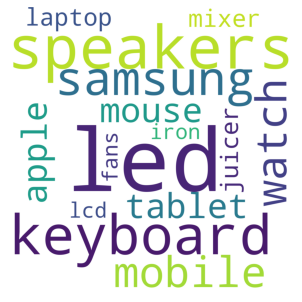

In [68]:
r=electronic['Product'].str.lower()
r = r.to_string()
s=electronic['Order_Priority'].str.lower()
stopwords = set(STOPWORDS) 
wc = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, min_font_size = 10)
wc = wc.generate(r)
plt.figure(facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

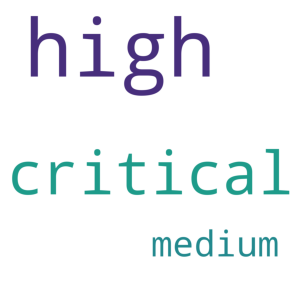

In [69]:
s = s.to_string()
wc = wc.generate(s)
plt.figure(facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

AMAZON CELL PHONE REVIEW
>NAME:PREETHI P
>ID NO:20181CSE0568

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/content/Amazon_Cell_Phone_Review.csv')
data.head()

,asin,brand,title,Unnamed: 3,Unnamed: 4,rating,review,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,NaN,NaN,3,I feel so LUCKY to have found this used (phone...,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,NaN,NaN,2.9,"nice phone, nice up grade from my pantach revu...",7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,NaN,NaN,2.6,Very pleased,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,NaN,NaN,2.4,It works good but it goes slow sometimes but i...,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,NaN,NaN,3.3,Great phone to replace my lost phone. The only...,21,NaN


In [71]:
Rating = data['rating'].head(6)
Brand= data['brand'].head(6)

PIE CHART

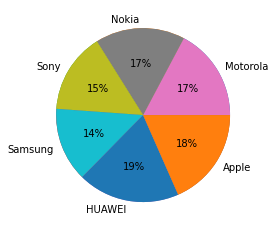

In [72]:
plt.pie(Rating)
labels=['Motorola','Nokia','Sony','Samsung','HUAWEI','Apple']
plt.pie(Rating,labels=labels,autopct="%0.lf%%")
plt.show()

BAR GRAPH

In [73]:
Rating = data['rating'].head(200)
Brand= data['brand'].head(200)

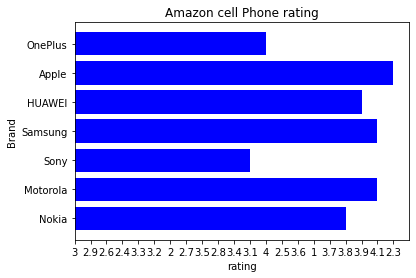

In [74]:
plt.barh( Brand,Rating,color='blue')
plt.ylabel("Brand")
plt.xlabel("rating")
plt.title("Amazon cell Phone rating")
plt.show()

SCATTER PLOT

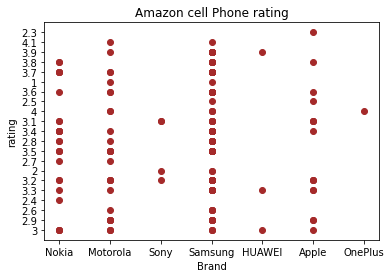

In [75]:
plt.scatter(Brand,Rating,color='brown')
plt.xlabel("Brand")
plt.ylabel("rating")
plt.title("Amazon cell Phone rating")
plt.show()

SEABORN

COUNTPLOT

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

%matplotlib inline

In [77]:
df = pd.read_csv('/content/Amazon_Cell_Phone_Review.csv').head(200)
df.head()

,asin,brand,title,Unnamed: 3,Unnamed: 4,rating,review,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,NaN,NaN,3,I feel so LUCKY to have found this used (phone...,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,NaN,NaN,2.9,"nice phone, nice up grade from my pantach revu...",7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,NaN,NaN,2.6,Very pleased,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,NaN,NaN,2.4,It works good but it goes slow sometimes but i...,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,NaN,NaN,3.3,Great phone to replace my lost phone. The only...,21,NaN


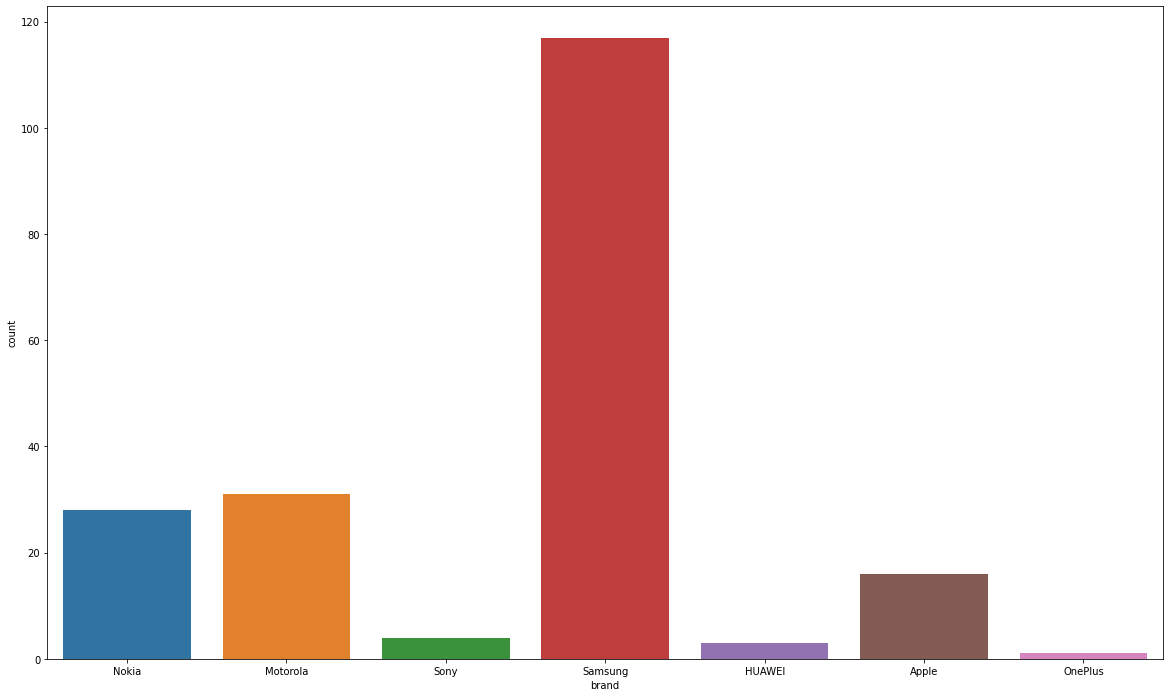

In [78]:
plt.figure(figsize=(20,12))
sns.countplot(x = 'brand', data =df)

WordCloud

In [79]:
from collections import Counter

In [80]:
brand_counter = Counter()

In [81]:
for response in Brand :
    brand_counter.update(response.split(";"))

In [82]:
Rating = []
Brand= []

for item in brand_counter.most_common():
  Rating.append(item[0])
  Brand.append(item[1])

In [83]:
print(Rating)
print(Brand)

['Samsung', 'Motorola', 'Nokia', 'Apple', 'Sony', 'HUAWEI', 'OnePlus']
[117, 31, 28, 16, 4, 3, 1]


In [84]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data
from wordcloud import WordCloud, STOPWORDS

In [85]:
print(STOPWORDS)

{'otherwise', 'few', 'how', "doesn't", 'like', 'against', 'my', "didn't", 'our', "i've", 'have', 'just', 'it', 'an', "here's", 'itself', 'your', "you're", 'been', "how's", "it's", 'which', "shan't", "isn't", 'nor', "we'd", 'a', 'his', "they'll", 'you', "where's", "they'd", 'k', 'out', 'shall', 'was', 'yours', 'com', 'are', 'those', "mustn't", 'too', "we'll", 'each', 'www', 'cannot', 'they', 'r', "wouldn't", "couldn't", 'or', "haven't", 'such', 'again', "why's", 'him', 'yourselves', 'of', "hadn't", 'am', 'me', 'through', 'once', 'that', 'further', 'both', 'can', 'get', 'myself', 'same', 'had', 'at', 'above', 'before', 'up', "he'd", 'off', 'also', "shouldn't", 'yourself', "he's", 'any', 'under', 'were', 'because', 'only', 'could', 'doing', 'for', 'own', 'after', 'i', 'why', 'all', 'in', "you'd", "hasn't", 'about', 'here', 'themselves', 'we', 'ours', 'would', "when's", 'having', 'most', "she'd", "aren't", "i'll", 'where', "who's", "i'd", 'does', 'being', 'since', 'and', 'between', 'who', 

In [86]:
a = [1,1,2,2]

print(set(a))

{1, 2}


In [87]:
Review = open('/content/Amazon_Cell_Phone_Review.csv', 'r',encoding='utf-8').read()

#Remove Stop Words
Review_stopwords = set(STOPWORDS)

In [88]:
Review_stopwords = set(STOPWORDS)

In [89]:
Review_wc = WordCloud(background_color='white', max_words=1000, stopwords=Review_stopwords)

In [90]:
Review_wc.generate(Review)

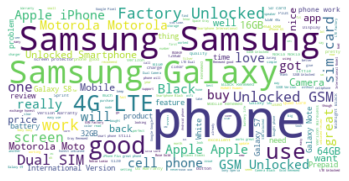

In [91]:
plt.imshow(Review_wc, interpolation='bilinear')
plt.axis('off') #?
plt.show()

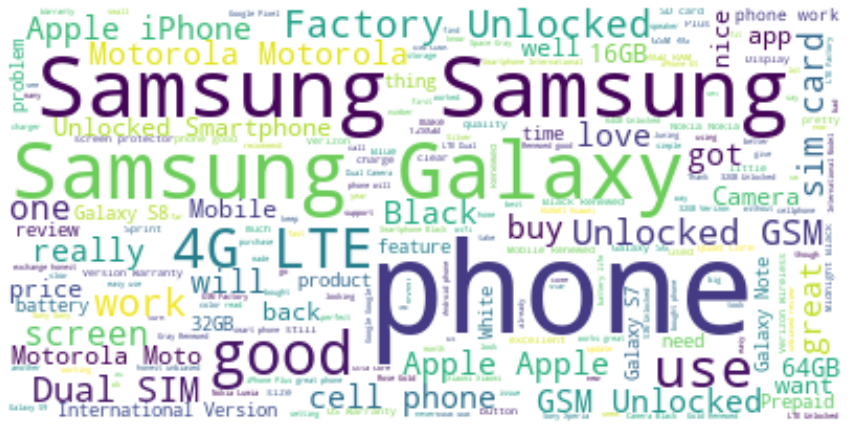

In [92]:



fig = plt.figure()
fig.set_figwidth(15) # set width
fig.set_figheight(12) # set height
plt.imshow(Review_wc, interpolation='bilinear')
plt.axis('off') #?
plt.show()

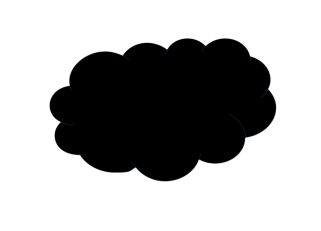

In [94]:
import numpy as np

amazon_mask = np.array(Image.open('/content/cloud.png'))

#Display mask
# fig = plt.figure()
# fig.set_figwidth(6) # set width
# fig.set_figheight(8) # set height
plt.imshow(amazon_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

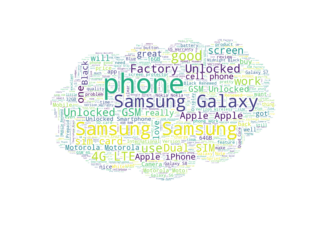

In [95]:
amazon_wc = WordCloud(background_color='white', max_words=5000, mask=amazon_mask, stopwords=Review_stopwords)

# generate the word cloud
amazon_wc.generate(Review)
plt.imshow(amazon_wc, interpolation='bilinear')
plt.axis('off')
plt.show()